<a href="https://colab.research.google.com/github/subupkrl/Python/blob/master/EDA_Of_google_playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/google_cleaned_data.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8,1
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6,8
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6,20


**EDA - Exploratory Data Analysis**

In [5]:
df[df.duplicated('App')].shape

(1181, 17)

In [7]:
#drop duplicate data
df = df.drop_duplicates(subset = ['App'], keep = 'first')

In [8]:
df.shape

(9659, 17)

**Explore Data**

In [9]:
#numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('We have {} numerical features:{} ' .format(len(numerical_features),numerical_features))

We have 9 numerical features:['Unnamed: 0', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'year', 'month', 'day'] 


In [10]:
#categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('We have {} categorical features:{} '.format(len(categorical_features),categorical_features))

We have 8 categorical features:['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 


In [11]:
#porportion of count data on categorical features
for col in categorical_features:
  print(df[col].value_counts(normalize = 'True')*100)
  print('...................')


App
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
                                                        ...   
Learn To Draw Kawaii Characters                       0.010353
3D Color Pixel by Number - Sandbox Art Coloring       0.010353
Mandala Coloring Book                                 0.010353
Tattoo Name On My Photo Editor                        0.010353
Name Art Photo Editor - Focus n Filters               0.010353
Name: proportion, Length: 9659, dtype: float64
...................
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872

In [12]:
#replacing infinity
df = df.replace([np.inf, - np.inf],np.nan)


In [13]:
for col in numerical_features:
  print(df[col].value_counts(normalize = 'True')*100)
  print('..............')

Unnamed: 0
10840    0.010353
0        0.010353
1        0.010353
2        0.010353
3        0.010353
           ...   
15       0.010353
14       0.010353
13       0.010353
12       0.010353
11       0.010353
Name: proportion, Length: 9659, dtype: float64
..............
Rating
4.3    10.944363
4.4    10.919961
4.5    10.346510
4.2     9.882870
4.6     8.333333
4.1     7.576867
4.0     6.259151
4.7     5.392875
3.9     4.380185
3.8     3.489507
5.0     3.306491
3.7     2.733041
4.8     2.696437
3.6     2.037579
3.5     1.903367
3.4     1.537335
3.3     1.220107
4.9     1.037091
3.0     0.988287
3.1     0.841874
3.2     0.768668
2.9     0.549048
2.8     0.488043
2.6     0.292826
2.7     0.280625
2.3     0.244021
2.5     0.244021
2.4     0.231820
1.0     0.195217
2.2     0.170815
2.0     0.146413
1.9     0.134212
1.7     0.097609
1.8     0.097609
2.1     0.097609
1.6     0.048804
1.4     0.036603
1.5     0.036603
1.2     0.012201
Name: proportion, dtype: float64
..............
Reviews
0  

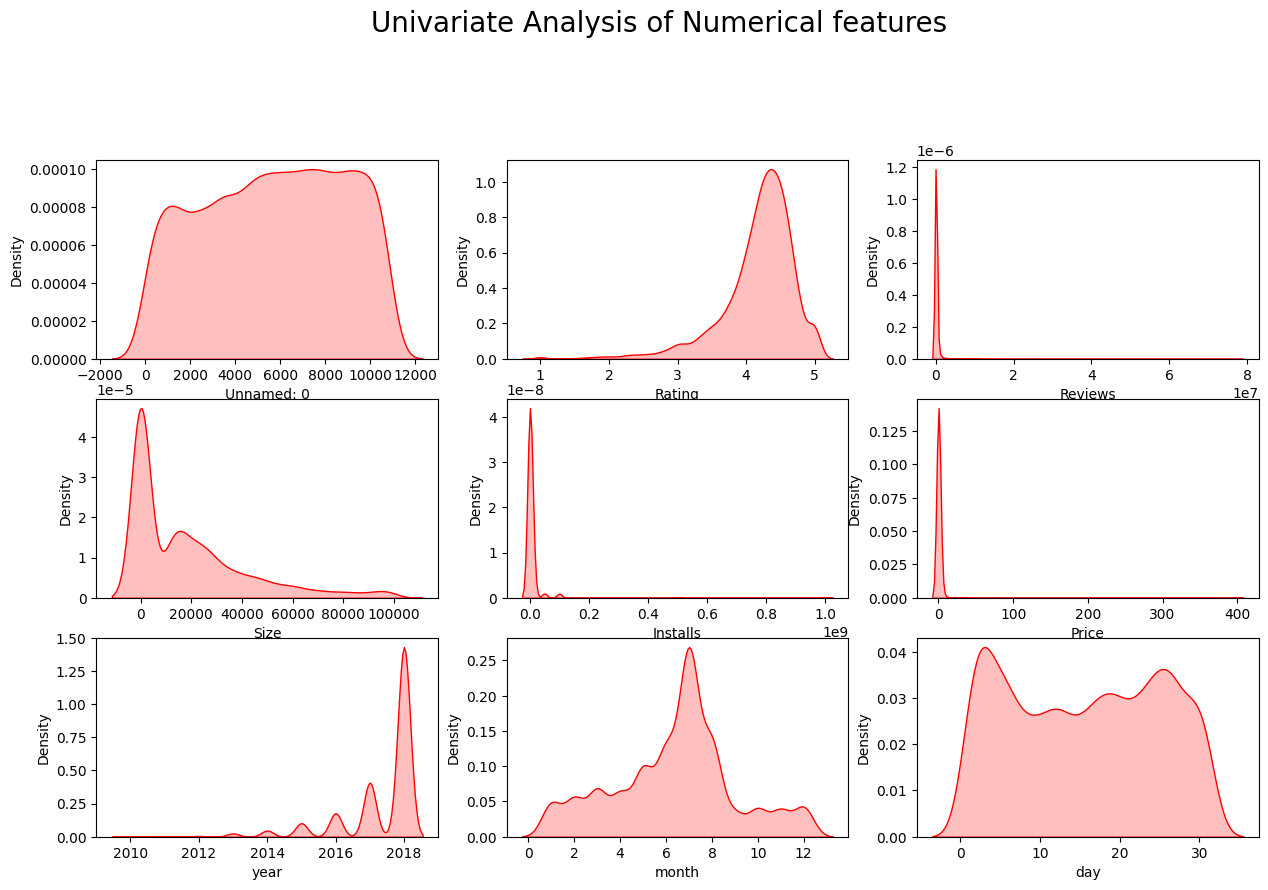

In [ ]:
#uni-variate analysis of numerical features
# KDE - Kernel Density Estimate
# propobability density for continuous variable, central tendency and spread

plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Numerical features',fontsize = 20)

for i in range(0,len(numerical_features)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(x = df[numerical_features[i]], fill = True, color = 'red')
  plt.xlabel(numerical_features[i])
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28459 (\N{CJK UNIFIED IDEOGRAPH-6F2B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21654 (\N{CJK UNIFIED IDEOGRAPH-5496}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12305 (\N{RIGHT BLACK LENTICULAR BRACKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fi

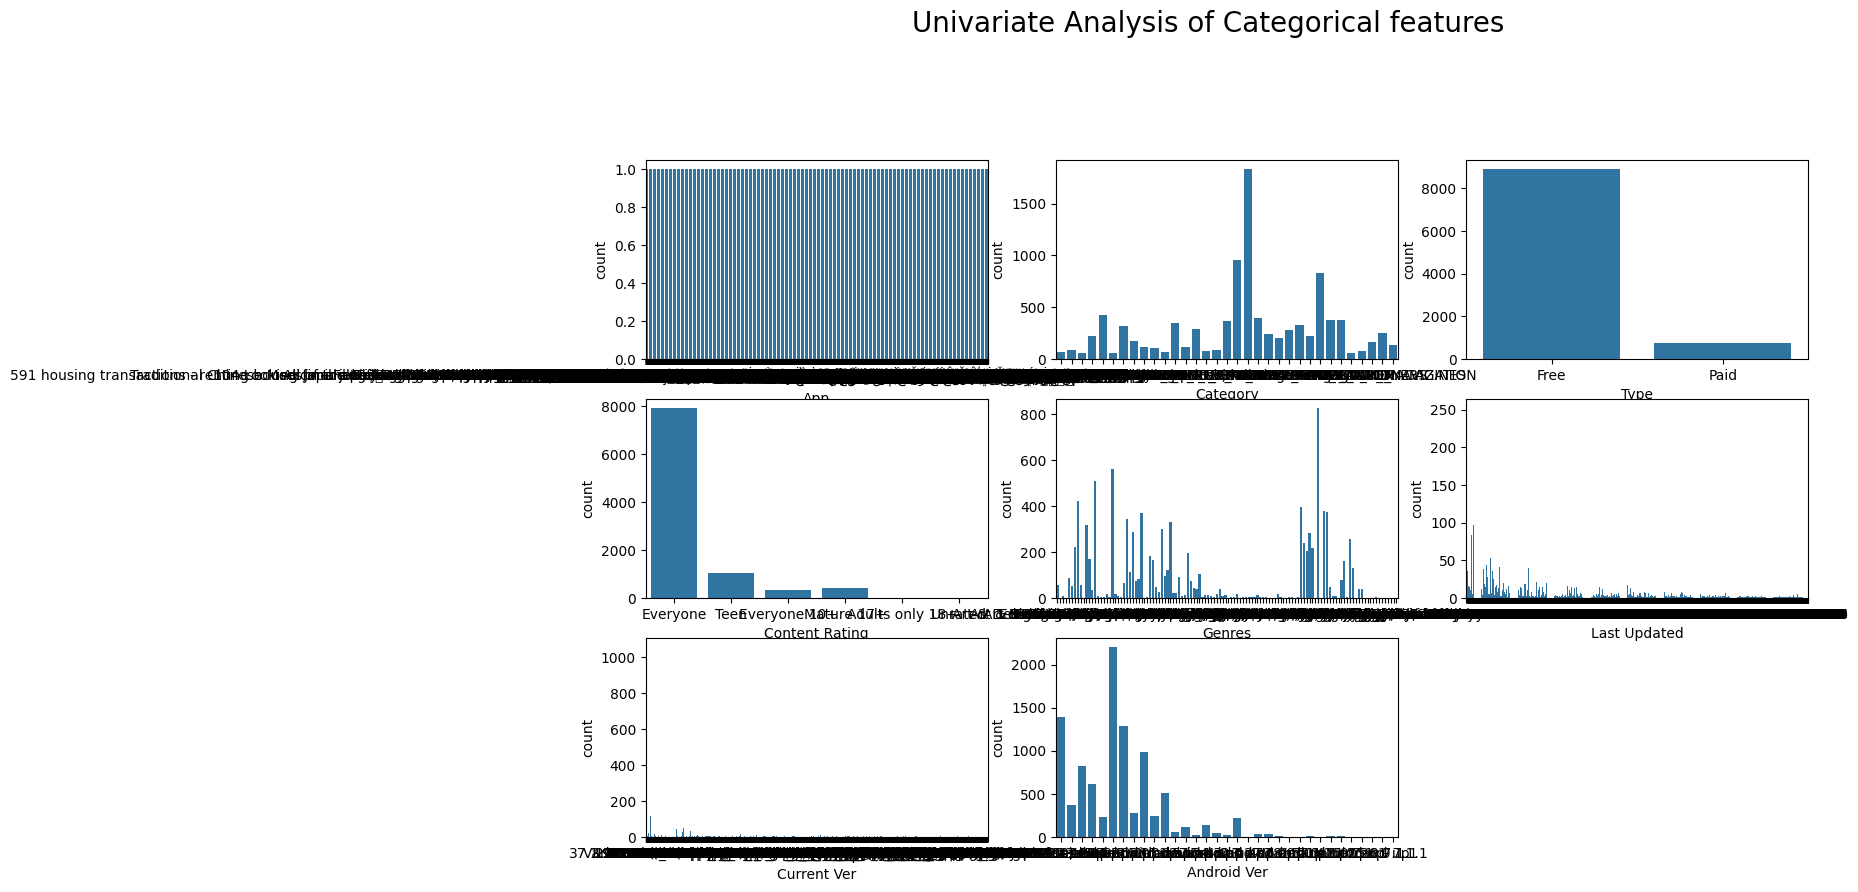

In [14]:
#uni-variate for categorical features
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Categorical features',fontsize = 20)

for i in range(0,len(categorical_features)):
  plt.subplot(5,3,i+1)
  sns.countplot(x = df[categorical_features[i]])
  plt.xlabel(categorical_features[i])
plt.show()

/tmp/ipython-input-3918685420.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[category[i]], palette = 'viridis')
/tmp/ipython-input-3918685420.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[category[i]], palette = 'viridis')


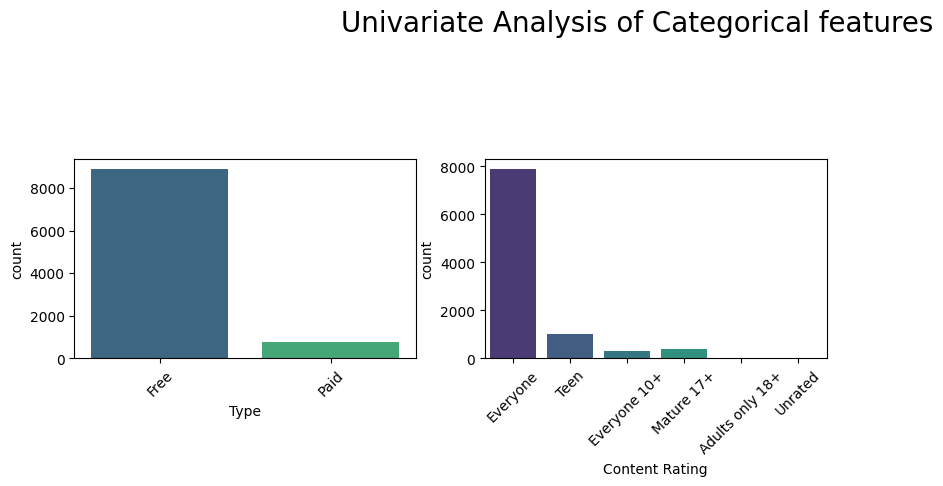

In [15]:
from pandas.core.arrays import categorical
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Categorical features',fontsize = 20)

category = ['Type','Content Rating']

for i in range(0,len(category)):
  plt.subplot(5,3,i+1)
  sns.countplot(x = df[category[i]], palette = 'viridis')
  plt.xlabel(category[i])
  plt.xticks(rotation = 45)
plt.show()


<Axes: ylabel='count'>

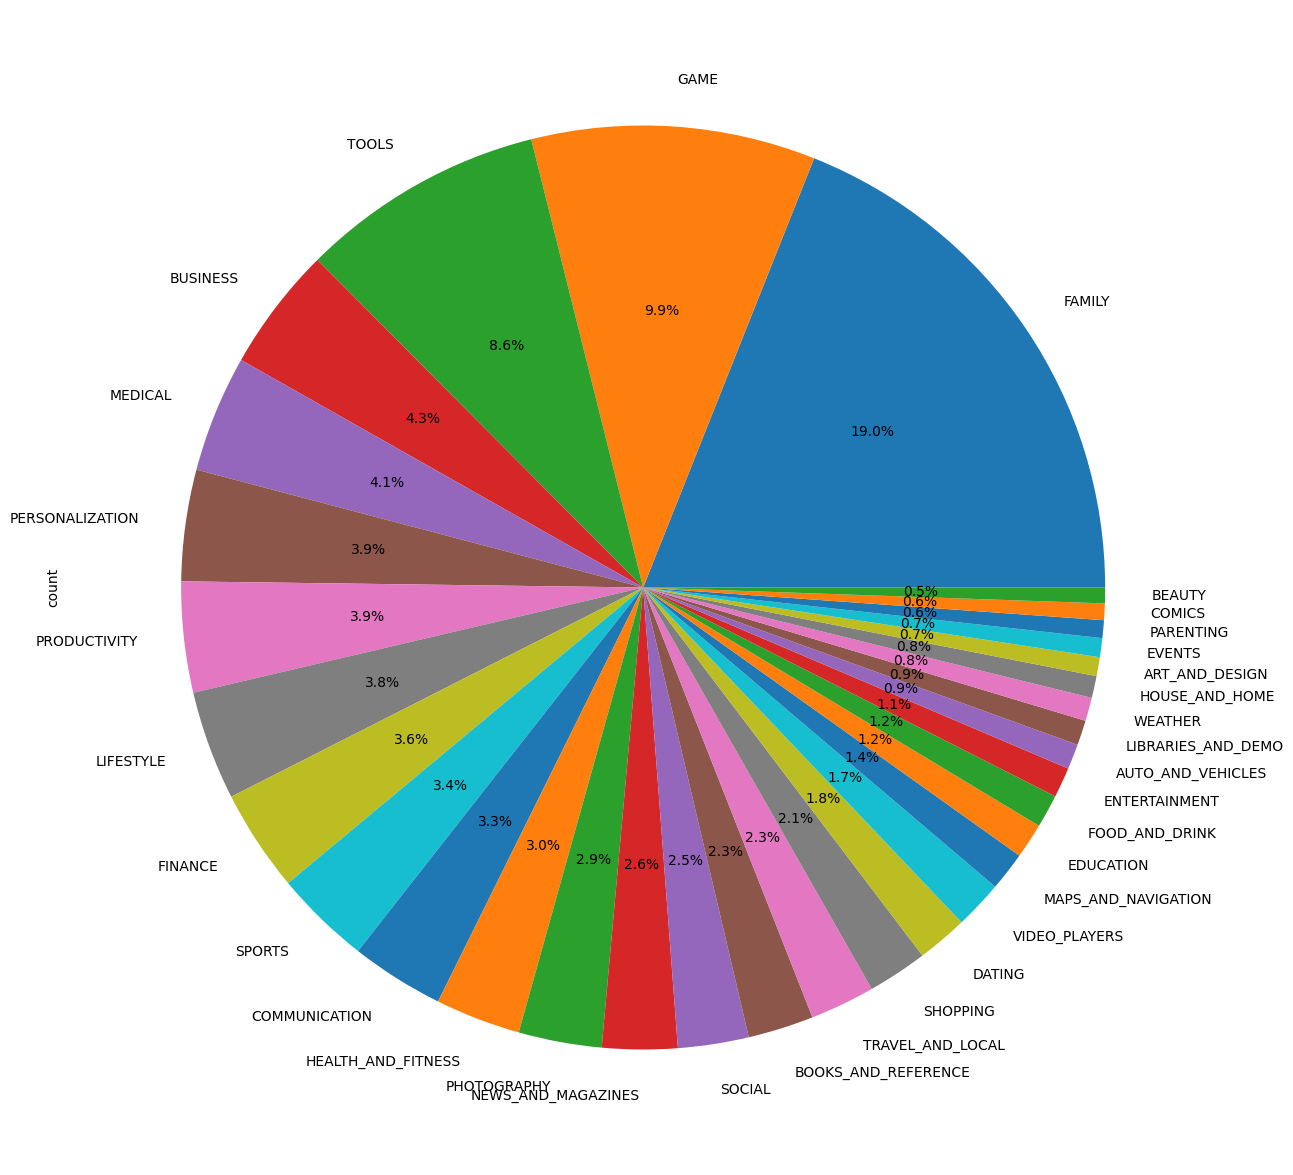

In [16]:
#find popular category
df['Category'].value_counts().plot.pie(y=df['Category'].value_counts(),figsize=(15,15),autopct = '%1.1f%%')

**Observation** : From the above pie chart, we conclude the most popular category is family and the least popular category is beauty

In [17]:
#showing top 10 popular category
df['Category'].value_counts().head(10)

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


<Axes: xlabel='Category'>

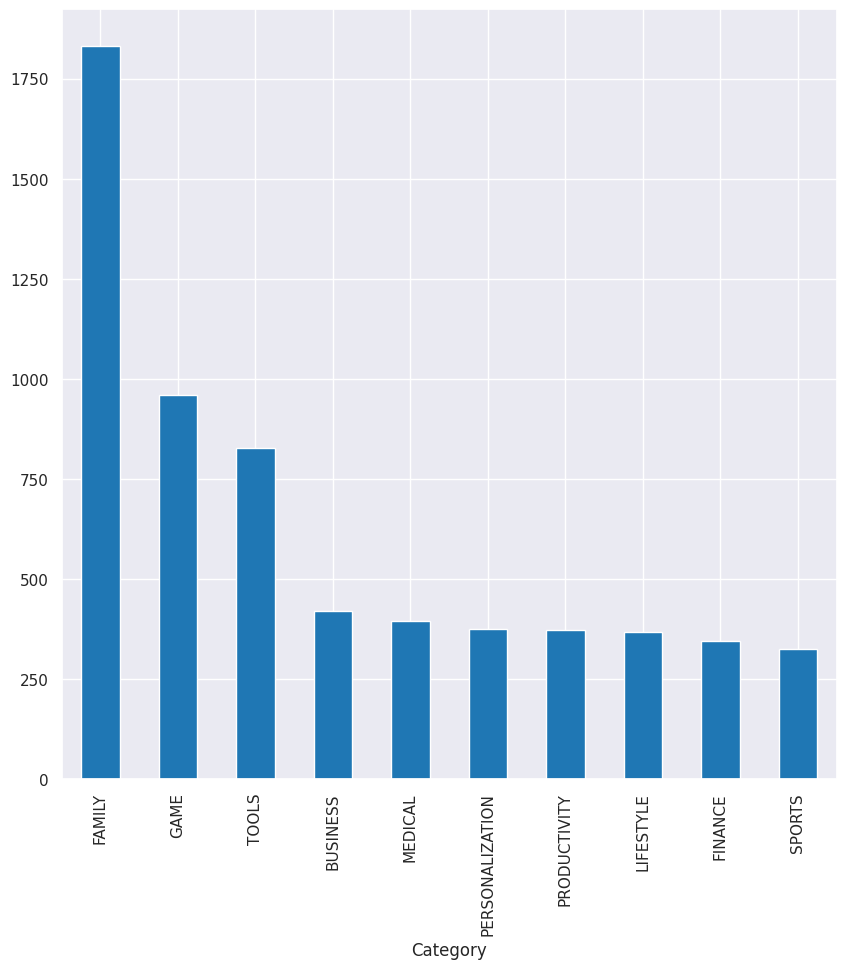

In [25]:
#plotting top 10 in bar plot
df['Category'].value_counts().head(10).plot.bar(figsize=(10,10))

Text(0.5, 1.0, 'Top 10 category with largest installation')

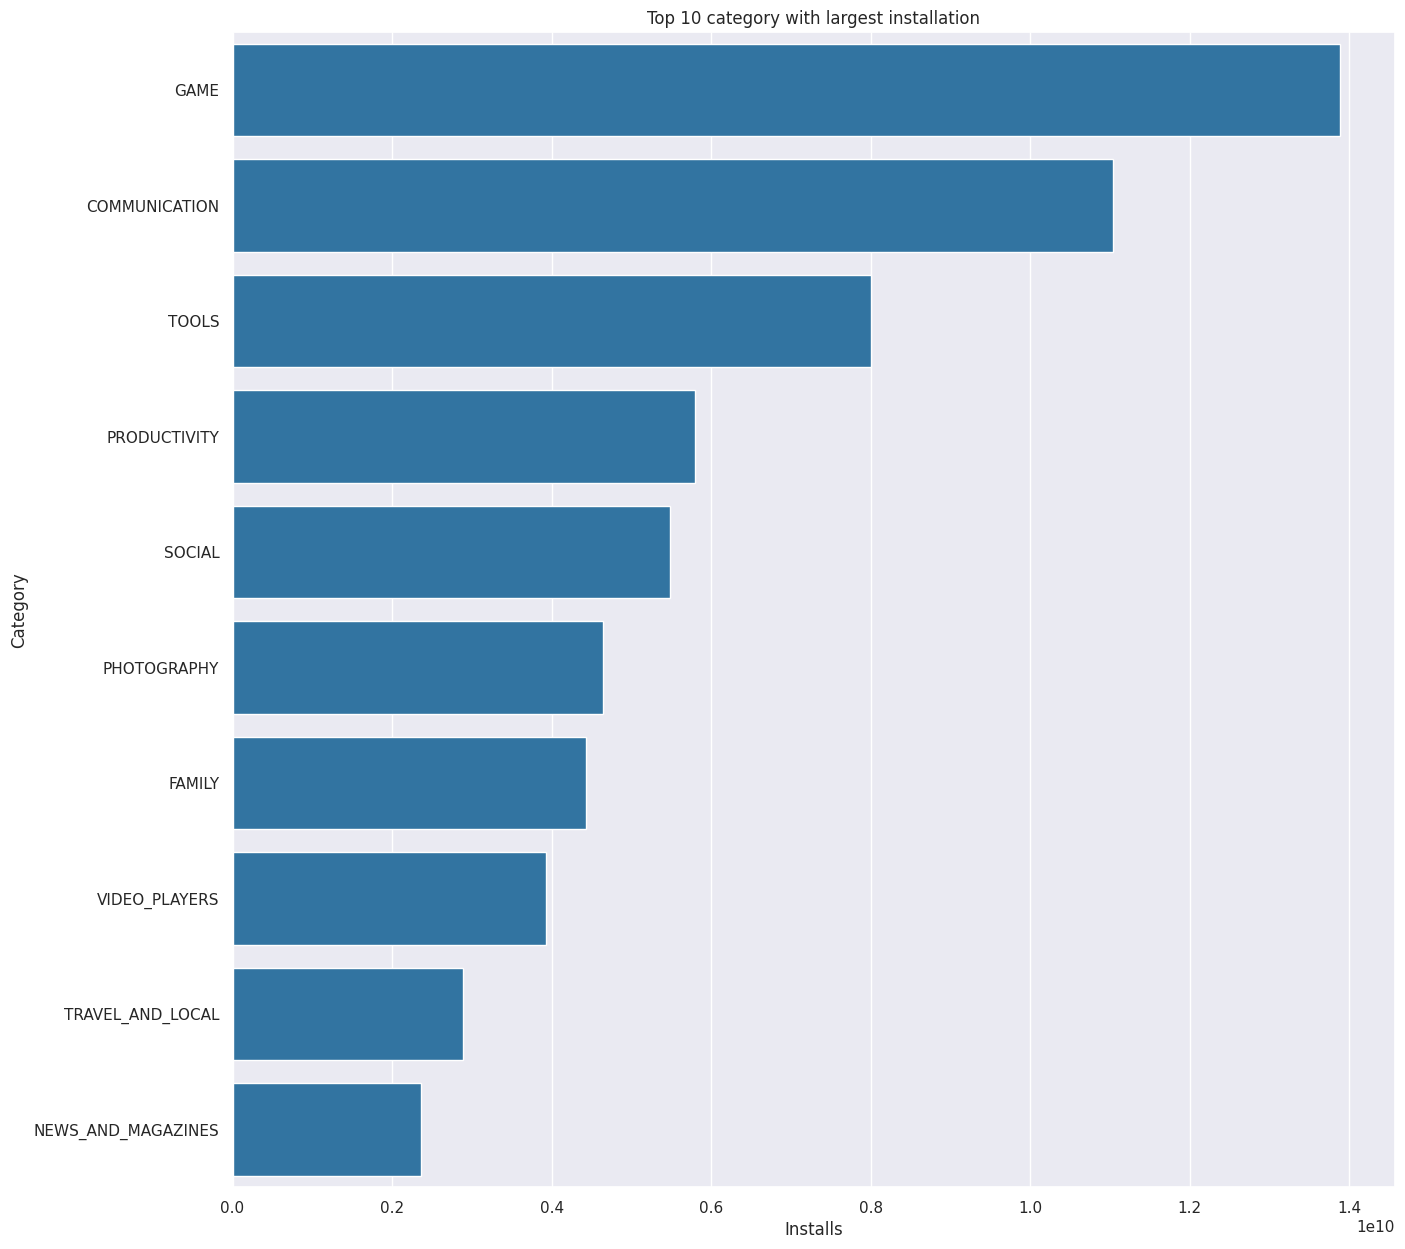

In [26]:
#catgory with largest installation
df_category_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending = False).reset_index()
df2 = df_category_installs.head(10)
plt.figure(figsize=(15,15))
sns.set_style('darkgrid')
sns.set_context('notebook')
ax = sns.barplot(x = 'Installs', y = 'Category', data = df2)
ax.set_xlabel('Installs')
ax.set_ylabel('Category')
ax.set_title('Top 10 category with largest installation')

/tmp/ipython-input-2965005216.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'Installs', y = 'App', data = df3, palette='plasma')


Text(0.5, 1.0, 'Top 5 installed apps')

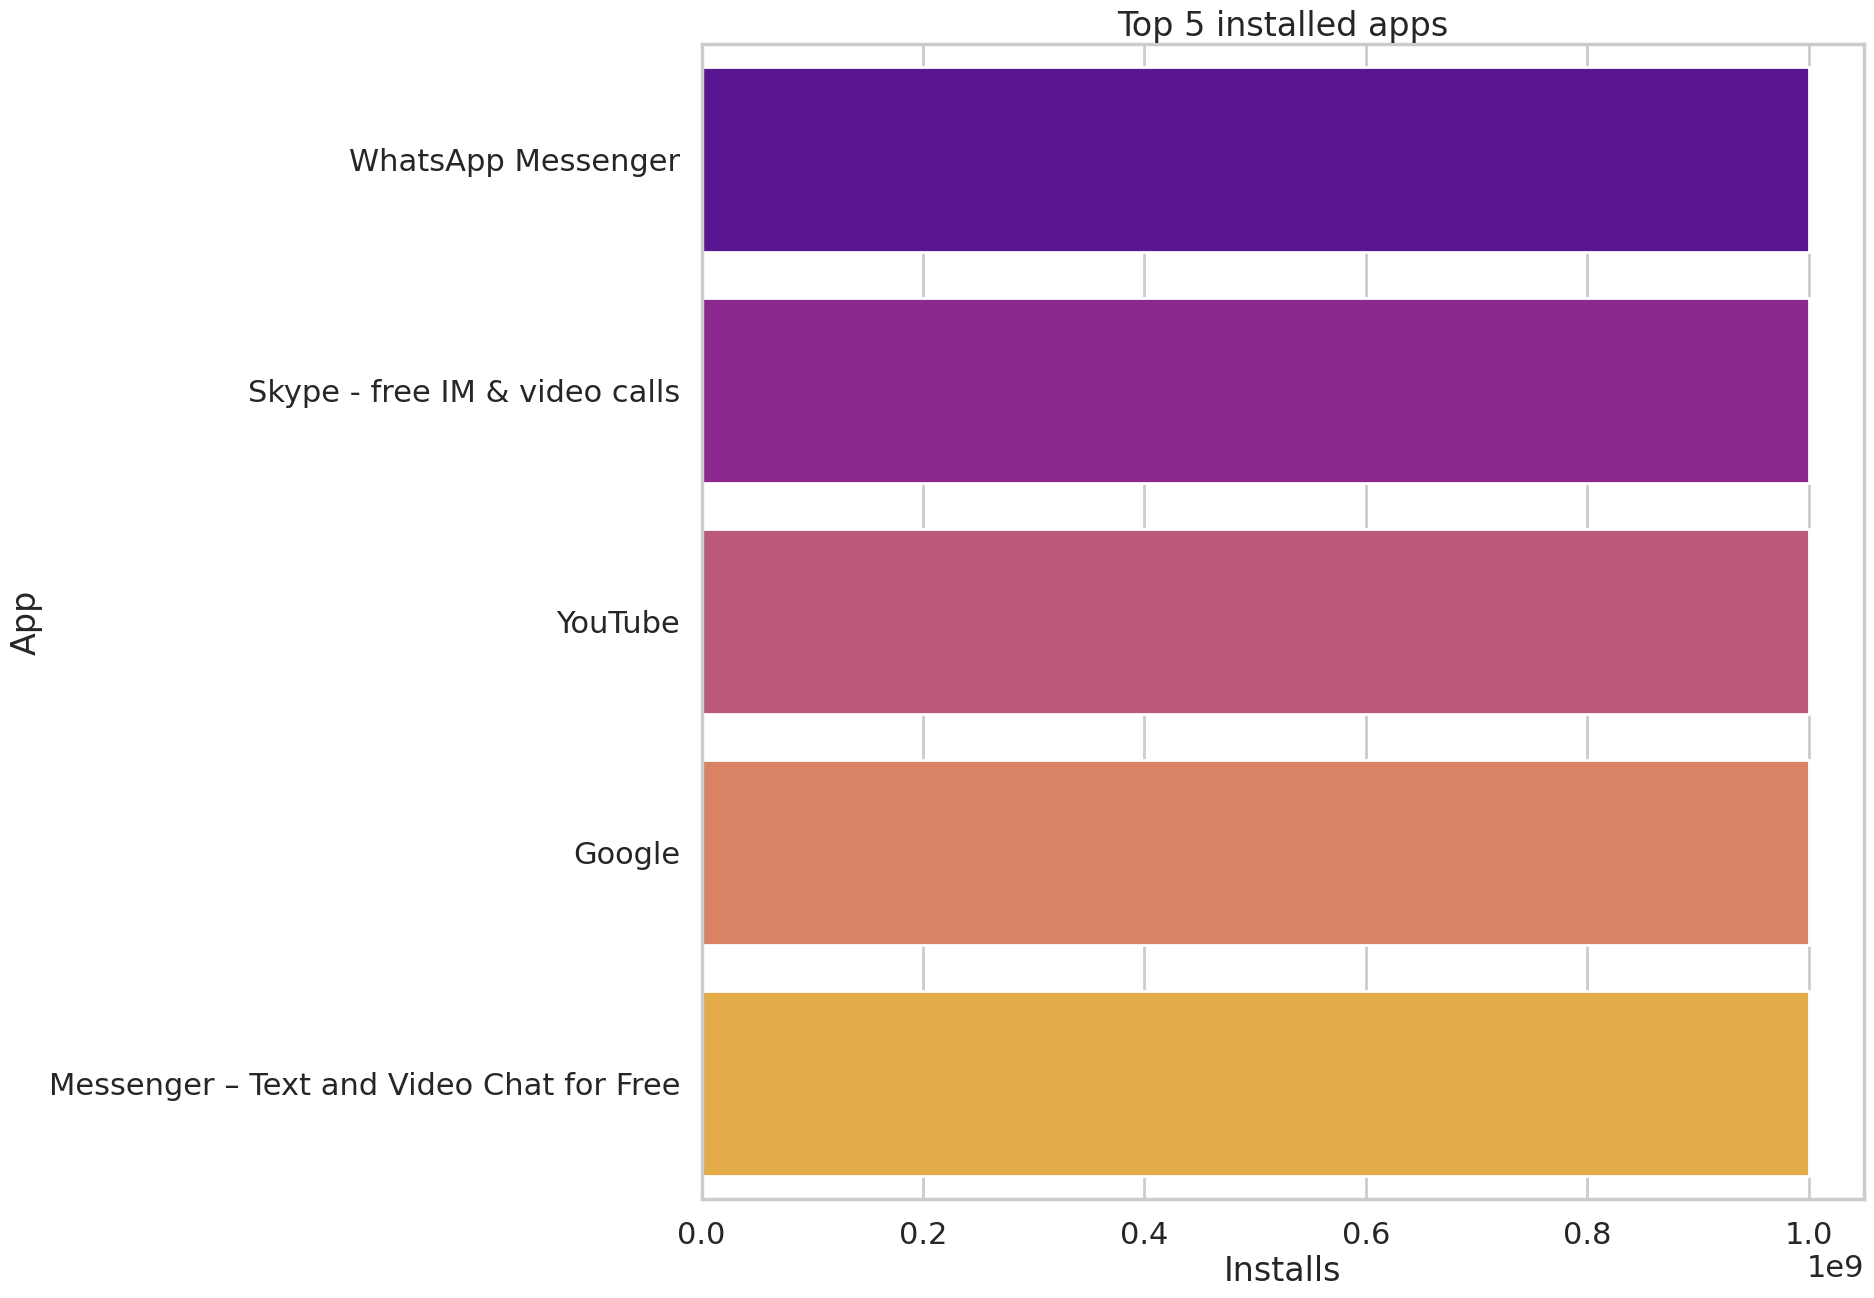

In [36]:
#top 5 installed apps
df_apps_installs = df.groupby('App')['Installs'].sum().sort_values(ascending = False).reset_index()
df3 = df_apps_installs.head(5)
plt.figure(figsize=(15,15))
sns.set_style('whitegrid')
sns.set_context('poster')
ax = sns.barplot(x = 'Installs', y = 'App', data = df3, palette='plasma')
ax.set_xlabel('Installs')
ax.set_ylabel('App')
ax.set_title('Top 5 installed apps')

In [38]:
#top 4 category ma top 5 installed apps
#using groupby
df_category_apps = df.groupby(['Category','App'])['Installs'].sum().sort_values(ascending = False).reset_index()
df4 = category[category.App == ]

In [64]:
#application having 5 rating
rating = df.groupby(['Category','Installs','App'])['Rating'].sum().sort_values(ascending = False).reset_index()
top_rating_apps= rating[rating.Rating == 5.00]
print(top_rating_apps.shape[0])

271
